In [1]:
%matplotlib notebook
import numpy as np
from numba import jit
from potentials import *
from distances import *
from sampling import *
from optimize import *
from integrators import *
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

In [10]:
def pot_gradient(coord, boxsize=(0,10), pbc=True, sig=1, eps=1):
    vecs = vectors(coord, boxsize, pbc)
    return gradients.LJ_cut(vecs, eps, sig) + 0*gradients.harmonic(coord,boxsize, pbc, r0 =(5, 5), k=5)
def pot(coord, pbc=True,boxsize=(0,10), sig=1, eps=1):
    vecs = vectors(coord, boxsize, pbc)
    dist = distances(vecs)
    return potentials.LJ_cut(dist, eps, sig) + potentials.harmonic(coord, boxsize, pbc, r0 =(5, 5),k=5)

In [11]:
r_init = mcmc(pot,20, 2, 10000, stepsize=0.01, beta=100, boxsize=(0,10), pbc=True, save_config=False)
v_init = np.zeros_like(r_init)
v_init[0] = [10,0]
r_matrix, v_matrix, a_matrix=vv(pot_gradient, r_init, v_init, 1, 10, 0.001, boxsize=(0,10), pbc=True)

<IPython.core.display.Javascript object>


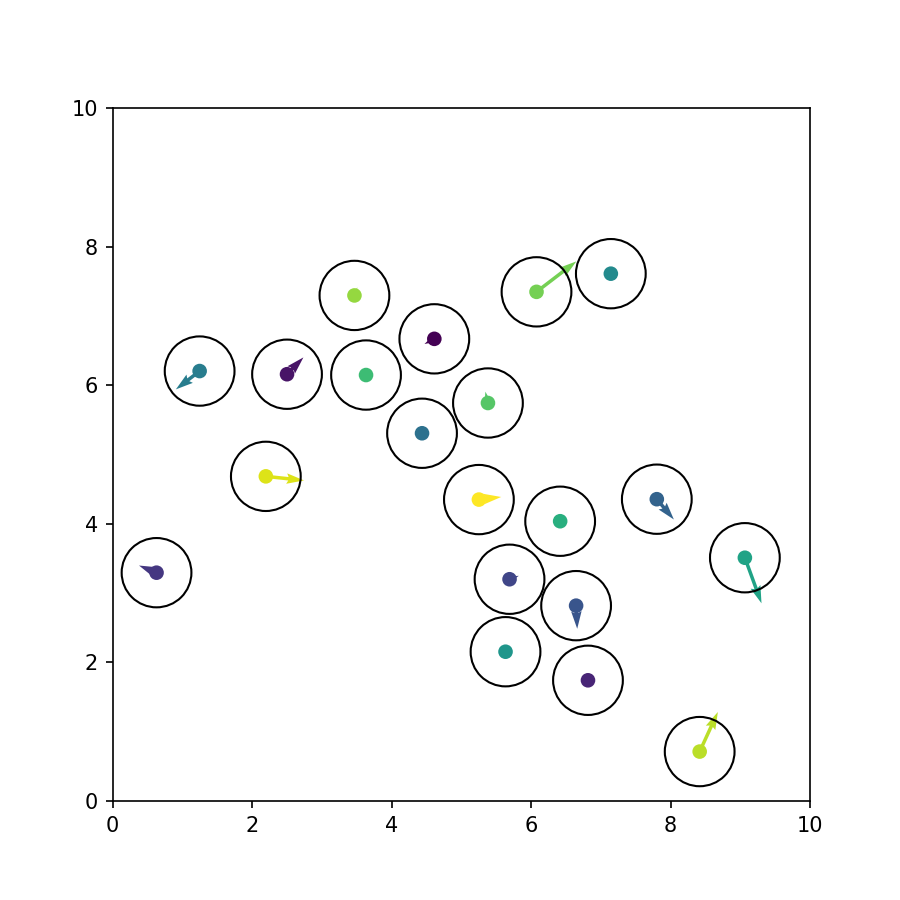

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(r_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(r_matrix[0,:,0], r_matrix[0,:,1], v_matrix[1,:,0], v_matrix[1,:,1],np.arange(len(r_init)),scale=50, width=0.005)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
def animate(i):
    index = 4*i
    data = r_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(v_matrix[index,:,0],v_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=20, frames=750, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

In [ ]:
def pot_gradient(coord, boxsize=(0,10),pbc=True, sig=1, eps=1):
    vecs = vectors(coord, boxsize, pbc)
    return gradients.LJ(vecs, eps, sig) + gradients.harmonic(coord, boxsize, pbc, r0 = (5,5,5), k=10)
def pot(coord, pbc=True,boxsize=(0,10), sig=1, eps=1):
    vecs = vectors(coord, boxsize, pbc)
    dist = distances(vecs)
    return potentials.LJ(dist, eps, sig) +  potentials.harmonic(coord, boxsize, pbc, r0 =(5, 5, 5),k=10)

In [ ]:
r_init = mcmc(pot,10, 3, 10000, stepsize=0.01, beta=100, boxsize=(0,10), pbc=True)
r_init = descent(r_init, pot_gradient, maxst=10000, pbc=True, save_config=False, boxsize=(0,10))
v_init = np.zeros_like(r_init)

In [ ]:
v_init[0] = [10,0,0]
r_matrix, v_matrix, a_matrix=vv(pot_gradient, r_init, v_init, 1, 10, 0.001, pbc=True, boxsize=(0,10))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], r_init[:,2])
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
def animate(i):
    index = 4*i
    data = r_matrix[index]
    scat._offsets3d=(data[:,0],data[:,1],data[:,2])
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=20, frames=1050, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

In [ ]:
beta_array = [0.01, 10, 50, 100, 1000]
config_array = [mcmc(pot, 100, 3, 5000, stepsize=0.01, beta=b, boxsize=(0,10), pbc=False) for b in beta_array]
plt.figure()
pot_array=[pot(c, boxsize=(0,10), pbc=False) for c in config_array]
plt.hist(pot_array,label=beta_array, bins=20,density=True)
plt.legend()
plt.show()

In [ ]:
r_init = mcmc(pot, 100, 3, 10000, 0.01, beta=100, boxsize=(0,10), pbc=True)

In [ ]:
r_matrix, v_matrix, a_matrix = langevin(pot_gradient, r_init, np.zeros_like(r_init), 1, 10, 0.001, damping=100,beta=1,temp=0, boxsize=(0,10), pbc=True)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], r_init[:,2])
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
def animate(i):
    index = 4*i
    data = r_matrix[index]
    scat._offsets3d=(data[:,0],data[:,1],data[:,2])
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=20, frames=1050, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

In [ ]:
kin_array = [1/2*np.linalg.norm(v)**2 for v in v_matrix]
#pot_array = [pot(r) for r in r_matrix]
plt.figure()
plt.plot(kin_array)
#plt.plot(np.sum(pot_array,axis=-1))